In [ ]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

import gensim
import spacy
import logging, warnings
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt



# Filtering unimportant warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
# timestamp, log level, and the message - only show messages that have a severity level of ERROR or higher
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

In [ ]:
# documents = pd.read_pickle(r'documents.pkl')
# id2word = pd.read_pickle(r'id2word.pkl')
# corpus = pd.read_pickle(r'corpus.pkl')
# data_ready = pd.read_pickle(r'data_ready.pkl')

In [ ]:
# # Take a long time
# # Build LDA model
# lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
#                                            id2word=id2word,
#                                            num_topics=20,
#                                            random_state=100,
#                                            update_every=1,
#                                            chunksize=10,
#                                            passes=10,
#                                            alpha='symmetric',
#                                            iterations=50,
#                                            per_word_topics=True)

# # print(lda_model.print_topics())

In [ ]:
# import pickle
# with open('/content/drive/MyDrive/Mollaei Topic Modelling/data/lda_model.pkl', 'wb') as f:
#    pickle.dump(lda_model, f)

In [ ]:
documents = pd.read_pickle(r'documents.pkl')
id2word = pd.read_pickle(r'id2word.pkl')
corpus = pd.read_pickle(r'corpus.pkl')
# lda_model = pd.read_pickle(r'lda_model.pkl')
data_ready = pd.read_pickle(r'data_ready.pkl')

In [ ]:
# pprint(lda_model.print_topics())

In [ ]:
# Compute Coherence Score
import gensim
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [ ]:
from tqdm import tqdm

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):

    coherence_values = []
    model_list = []
    for num_topics in tqdm(range(start, limit, step)):
        lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics,
                                           random_state=42,
                                           iterations=10,
                                           per_word_topics=True)
        model_list.append(lda_model)
        coherencemodel = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='u_mass')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
# Take a long time to run. :(
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_ready, start=2, limit=250, step=2)

100%|██████████| 124/124 [2:17:15<00:00, 66.41s/it] 


In [ ]:
import pickle
with open('/tmarkossian/212900/cati/model_list_3.pkl', 'wb') as f:
   pickle.dump(model_list, f)

In [ ]:
import pickle
with open('/tmarkossian/212900/cati/model_list123_3.pkl', 'wb') as f:
   pickle.dump(model_list[123], f)

In [ ]:
import pickle
with open('/tmarkossian/212900/cati/coherence_values_3.pkl', 'wb') as f:
   pickle.dump(coherence_values, f)

In [ ]:
len(model_list)

124

In [ ]:
# topic_weights = []
# for doc_bow in tqdm(corpus):
#     doc_topic_weights = model_list[123].get_document_topics(doc_bow)
#     topic_weights.append([weight for _, weight in doc_topic_weights])

In [ ]:
# model_list[123].get_document_topics(corpus[0])

In [ ]:
# lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15, random_state=42)

# doc_id = 0
# doc_bow = corpus[doc_id]
# doc_topic_probabilities = model_list[123].get_document_topics(doc_bow, minimum_probability=0)

# print("Topic-Doc probabilities Table")
# for topic_id, probability in doc_topic_probabilities:
#     print(f"Tobic {topic_id}: prob= {probability}")


In [ ]:
document_topic_matrix = [list(dict(model_list[123].get_document_topics(doc, minimum_probability=0)).values()) for doc in corpus]

In [ ]:
len(document_topic_matrix[0])

248

In [ ]:
sum1 = [i.sum() for i in np.array(document_topic_matrix)]
std1 = [i.std() for i in np.array(document_topic_matrix)]
tstd1 = [1/i for i in std1]

<ipython-input-15-b25717b5ff97>:3: RuntimeWarning: divide by zero encountered in divide
  tstd1 = [1/i for i in std1]


In [ ]:
columns1 = []
for i in range(0, len(document_topic_matrix[0])):
    columns1.append('Topic_'+str(i+1))

In [ ]:
df = pd.DataFrame(document_topic_matrix, columns = columns1)

In [ ]:
df['SUM'] = sum1
df['STD'] = std1
df['1/STD'] = tstd1

In [ ]:
data1 = pd.read_csv("/tmarkossian/212900/cati/notes_03012022.csv")

<ipython-input-61-a74cf422c4b9>:1: DtypeWarning: Columns (0,3,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118) have mixed types. Specify dtype option on import or set low_memory=False.
  data1 = pd.read_csv("/content/drive/MyDrive/Mollaei Topic Modelling/data/notes_03012022.csv")


In [ ]:
df.insert(loc=0, column='prog_note_id', value=data1['prog_note_id'].values)

In [ ]:
df.to_excel("/tmarkossian/212900/cati/lda_output.xlsx")

In [ ]:
df.shape

(33412, 252)

In [ ]:
df.head(20)

,prog_note_id,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,...,Topic_242,Topic_243,Topic_244,Topic_245,Topic_246,Topic_247,Topic_248,SUM,STD,1/STD
0,802591526,0.000030,0.000030,0.000030,0.000030,0.000030,0.000030,0.000030,0.000030,0.000030,...,0.000030,0.000030,0.000030,0.006584,0.000030,0.000030,0.000030,1.0,0.015987,62.551094
1,544984805,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,...,0.000027,0.000027,0.000027,0.000027,0.000027,0.009464,0.000027,1.0,0.020401,49.017185
2,591896054,0.000028,0.000028,0.012484,0.000028,0.000028,0.000028,0.000028,0.000028,0.000028,...,0.000028,0.000028,0.000028,0.000028,0.000028,0.000028,0.000028,1.0,0.018757,53.312417
3,609692777,0.000202,0.000202,0.000202,0.000202,0.000202,0.000202,0.000202,0.000202,0.000202,...,0.000202,0.000202,0.000202,0.000202,0.000202,0.000202,0.000202,1.0,0.038672,25.858719
4,585470357,0.008800,0.020330,0.000026,0.000026,0.000026,0.000026,0.000026,0.000026,0.000026,...,0.000026,0.000026,0.000026,0.000026,0.000026,0.000026,0.000026,1.0,0.019548,51.155254
5,543625091,0.018026,0.000032,0.000032,0.000032,0.000032,0.000032,0.000032,0.000032,0.000032,...,0.000032,0.000032,0.009057,0.000032,0.000032,0.000032,0.000032,1.0,0.040505,24.688131
6,543558276,0.000018,0.000018,0.000018,0.005055,0.000018,0.000018,0.000018,0.000018,0.000018,...,0.000018,0.000018,0.009879,0.000018,0.000018,0.007757,0.000018,1.0,0.016791,59.554700
7,651776192,0.000009,0.000009,0.068711,0.000009,0.000009,0.000009,0.007787,0.005205,0.018718,...,0.000009,0.000009,0.000009,0.000009,0.000009,0.000009,0.000009,1.0,0.020483,48.819912
8,672948609,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,0.021093,0.010221,0.029122,...,0.009955,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,1.0,0.014638,68.316855
9,573497987,0.000042,0.012116,0.000042,0.000042,0.060206,0.000042,0.000042,0.000042,0.000042,...,0.000042,0.000042,0.000042,0.000042,0.000042,0.012910,0.000042,1.0,0.029488,33.912064


In [ ]:
# model_list[123].show_topics(formatted=False)

In [ ]:
coherence_values[123]

-6.606624678226647

In [ ]:
len(model_list[123].print_topics())

20

In [ ]:
myldamodel = model_list[123]

In [ ]:
mytopics = myldamodel.show_topics(formatted=False, num_topics=248)

In [ ]:
len(mytopics)

248

In [ ]:
mylist = []
for i in range(10):
    for j in mytopics:
        if j[0] == i:
            mylist.append(j)

In [ ]:
len(mylist)

10

In [ ]:
mytopics2 = []
for topic in mylist:
    temp = []
    for word in topic[1]:
        temp.append(word[0])
    mytopics2.append(temp)

In [ ]:
columns = []
for i in range(0, len(mytopics2)):
    columns.append('topic '+str(i))

In [ ]:
# len(myldamodel.show_topics()), len(mytopics)

In [ ]:
pd.DataFrame(list(zip(*mytopics2)), columns=columns)

,topic 0,topic 1,topic 2,topic 3,topic 4,topic 5,topic 6,topic 7,topic 8,topic 9
0,cut,foot,vision,recall,dizziness,incision,retinal,amiodarone,cancer,risk
1,patch,ankle,heent,meter,dizzy,preventive,esophageal,nail,mass,high
2,lifelong,neuropathy,loss,nutrition,hct_plt,diazepam_valium,citrate,colorectal,benign,surgery
3,recurrent,endocrinology,stiffness,bruit,mcv_rdw,ruq,diverticulosis,hyperthyroidism,mammogram,fail
4,priority_medium,diabete,chill,humerus,lipase,abduction,bone_cartilage,forget,ultrasound,preoperative
5,titration,chest,bruise,glucose,facial,allegra,defect,express,diagnostic,gt
6,cva,diabetic,fever,weigh,lightheaded,westlake,disorder,discoloration,female,prior
7,hiv_pap_smear,bleed,numbness_tingle,aleem,neg_uleu,sarcoid,tape,cardioversion,recommendation,clinical
8,amlod,unreveale,wheeze,affirm,psyllium,sun,calcium,dark,malignancy,evaluation
9,nicotine,musculoskeletal,weakness,thinking,electrolyte,antigen,moist_exudate,classified,suspicious,met


In [ ]:
# pprint(model_list[4].print_topics())

In [ ]:
# model_list[4].print_topics()[0][1]

In [ ]:
len(model_list)

124

In [ ]:
coherence_values[:10]

[-0.9272059434675411,
 -0.8508648141919447,
 -0.8816694651011864,
 -0.9208654144112047,
 -1.02599246118933,
 -0.9597654657352165,
 -0.9296610537847191,
 -1.0270745735593905,
 -1.0851879867287442,
 -1.1581880530445454]

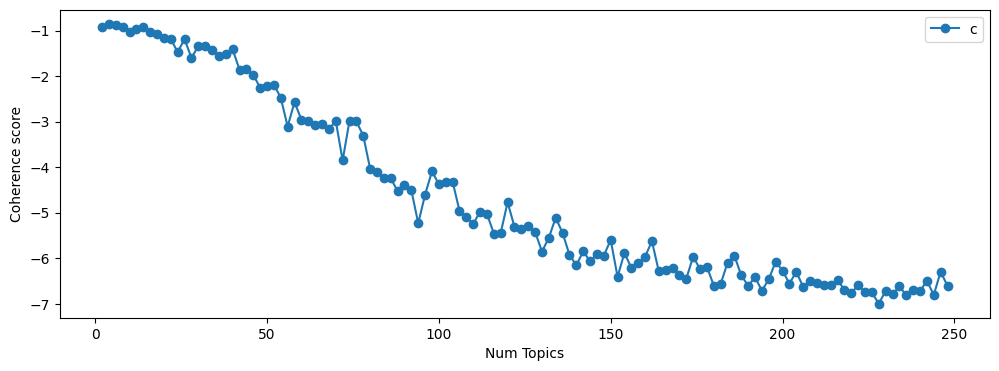

In [ ]:
plt.figure(figsize=(12,4))
start=2; limit=250; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values,"-o")
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

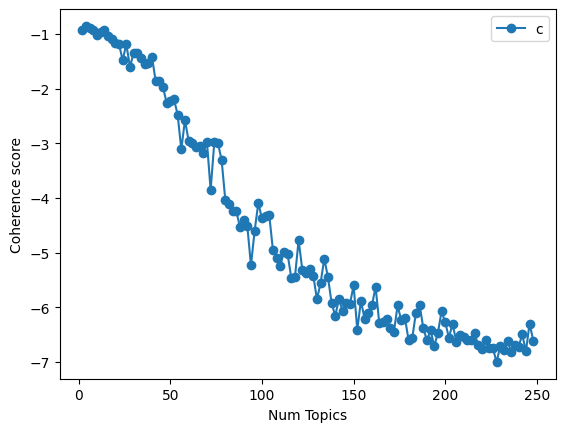

In [ ]:
start=2; limit=250; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values,"-o")
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
# Print the coherence scores
for m, cv in zip(x, coherence_values[:10]):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of -0.9272
Num Topics = 4  has Coherence Value of -0.8509
Num Topics = 6  has Coherence Value of -0.8817
Num Topics = 8  has Coherence Value of -0.9209
Num Topics = 10  has Coherence Value of -1.026
Num Topics = 12  has Coherence Value of -0.9598
Num Topics = 14  has Coherence Value of -0.9297
Num Topics = 16  has Coherence Value of -1.0271
Num Topics = 18  has Coherence Value of -1.0852
Num Topics = 20  has Coherence Value of -1.1582


In [ ]:
myldamodel = model_list[4]

In [ ]:
%%capture
def format_topics_sentences(ldamodel=None, corpus=corpus, texts= documents):
    sent_topics_df = pd.DataFrame()

    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)

    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=myldamodel, corpus=corpus, texts=data_ready)

df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

In [ ]:
df_dominant_topic.head(10)

In [ ]:
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet,
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)],
                                            axis=0)

sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

sent_topics_sorteddf_mallet.head(10)

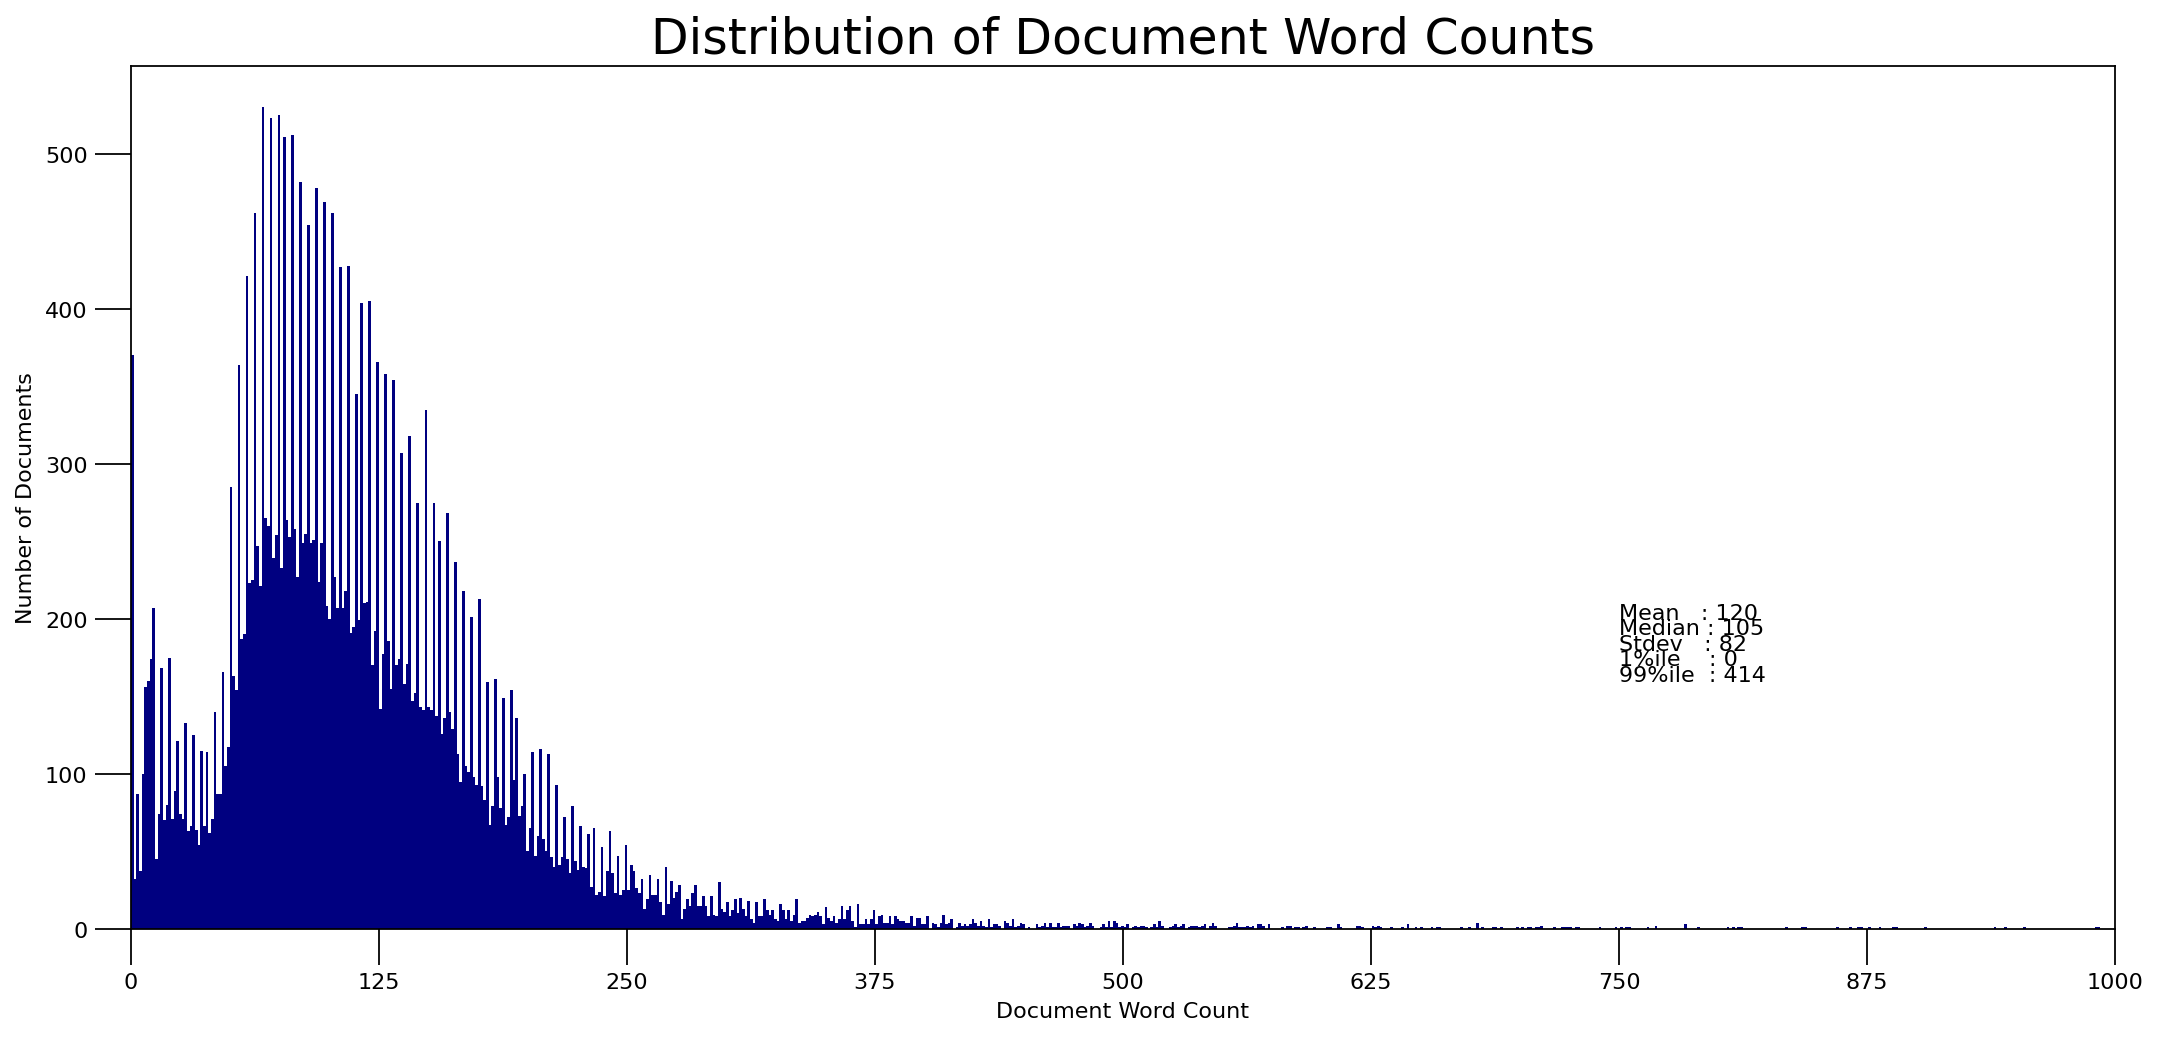

In [ ]:
doc_lens = [len(d) for d in df_dominant_topic.Text]

plt.figure(figsize=(16,7), dpi=160)
plt.hist(doc_lens, bins = 1000, color='navy')
plt.text(750, 200, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(750, 190, "Median : " + str(round(np.median(doc_lens))))
plt.text(750,  180, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(750,  170, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(750,  160, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 1000), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,1000,9))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
plt.show()

<ipython-input-43-ca4517ff537c>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
<ipython-input-43-ca4517ff537c>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
<ipython-input-43-ca4517ff537c>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
<ipython-input-43-ca4517ff537c>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(doc_lens, col

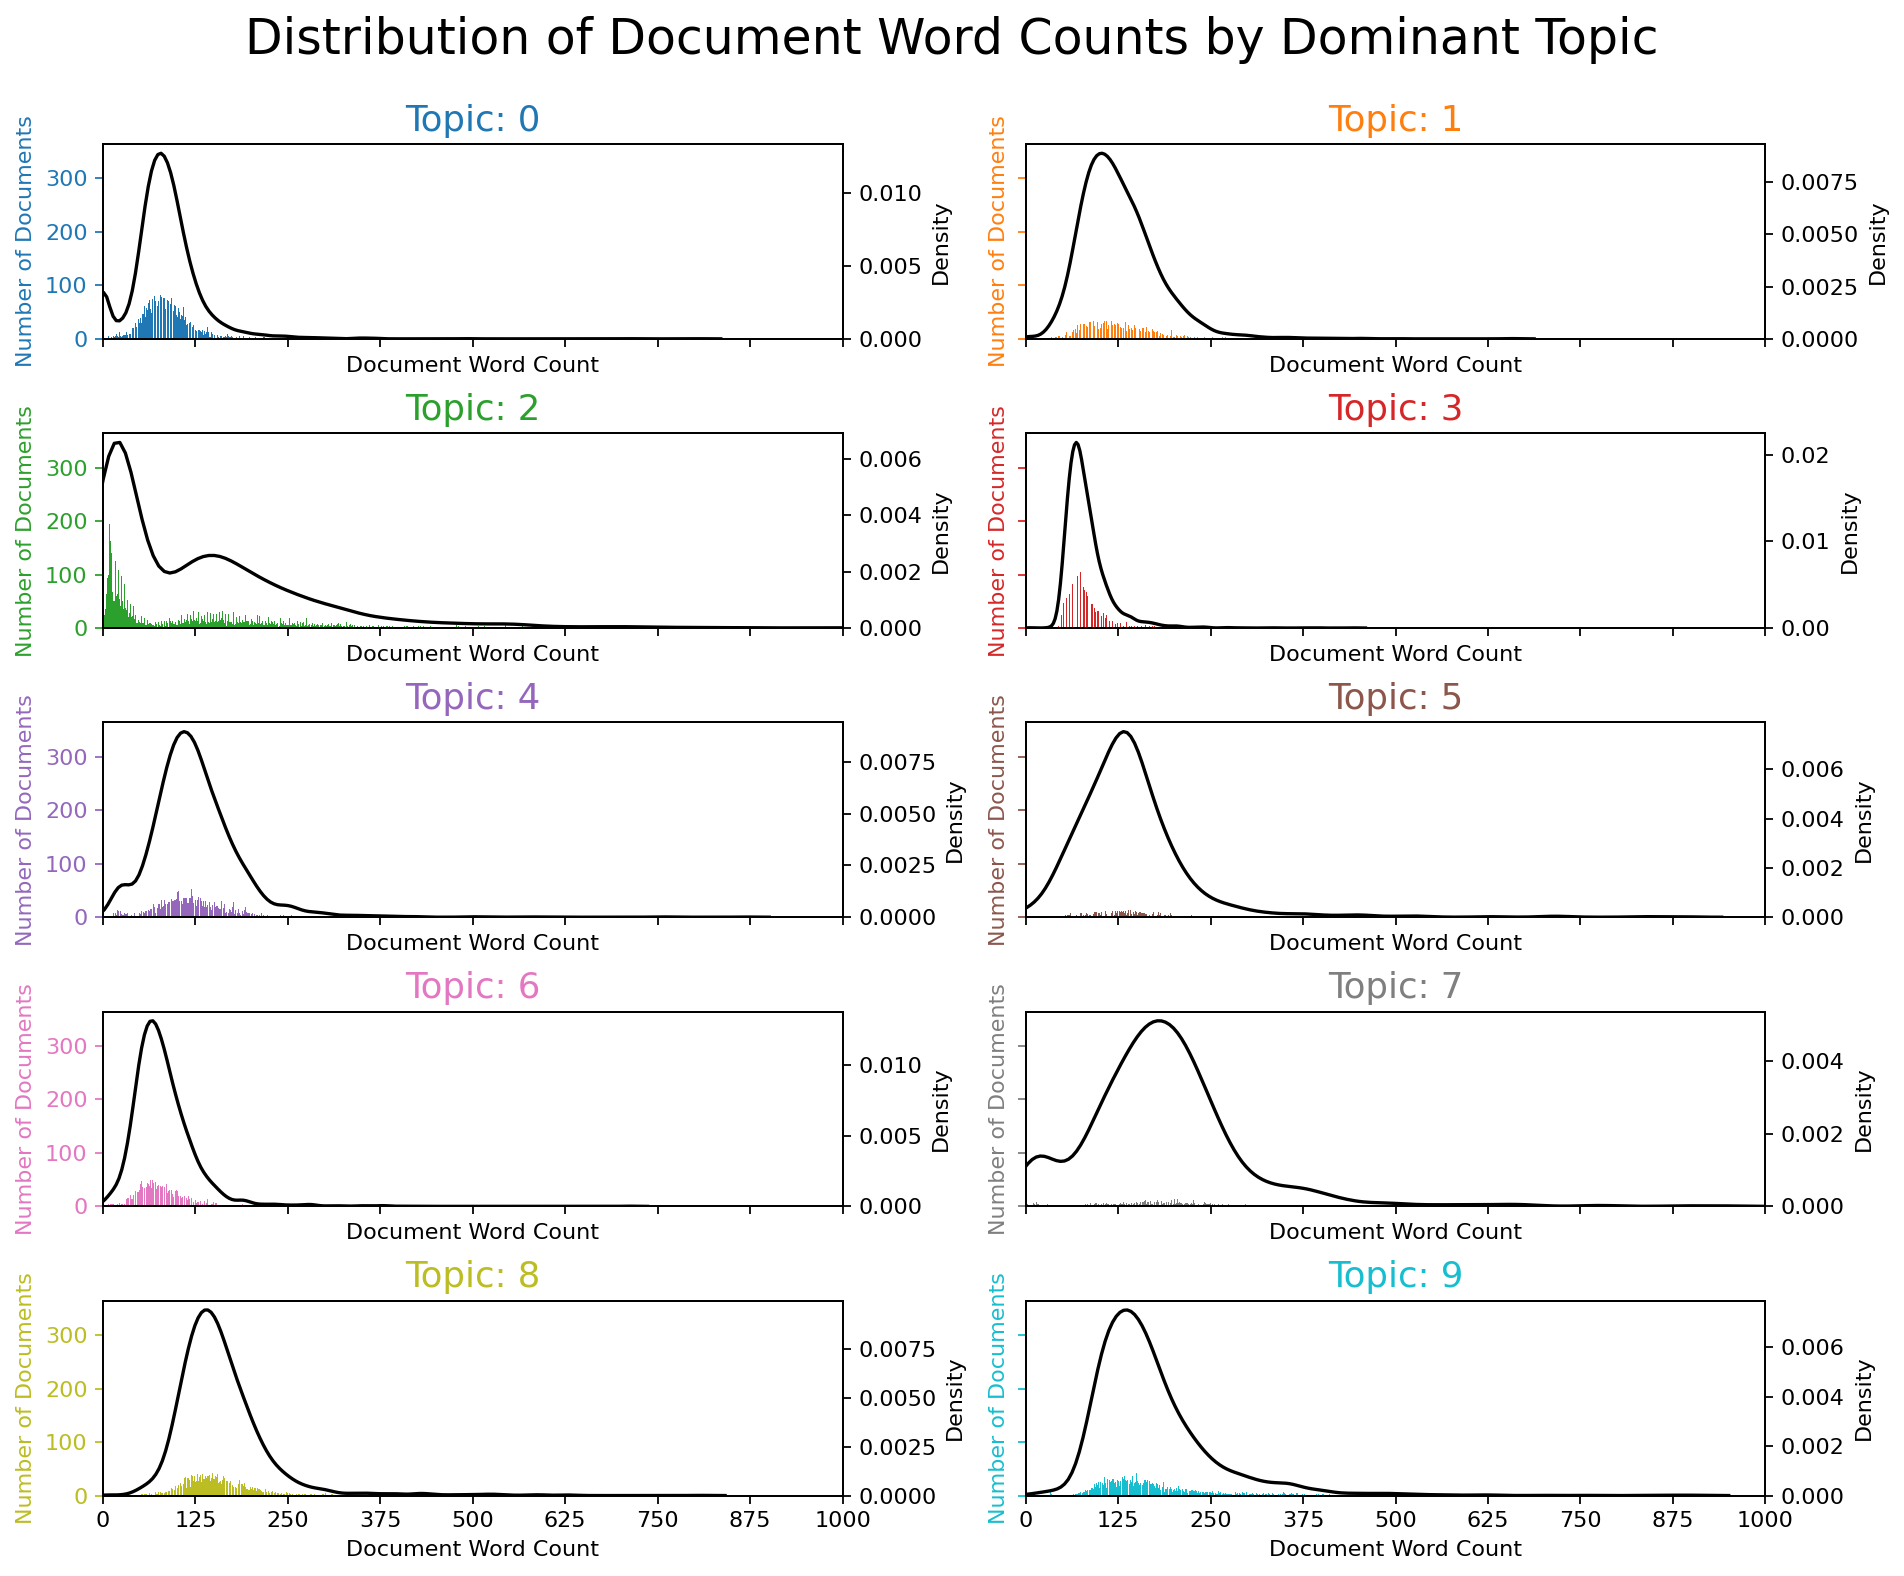

In [ ]:

import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]

fig, axes = plt.subplots(5,2,figsize=(12,10), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 1000, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 1000), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,1000,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()

In [ ]:
aditional_stopwords = pd.read_excel("/tmarkossian/212900/cati/top_100_words (1).xlsx")

In [ ]:
s4 = list(aditional_stopwords[-aditional_stopwords["Unnamed: 2"].isna()]['Word'].values)

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
s1 = stopwords.words('english')

!wget https://gist.githubusercontent.com/ZohebAbai/513218c3468130eacff6481f424e4e64/raw/b70776f341a148293ff277afa0d0302c8c38f7e2/gist_stopwords.txt
with open("gist_stopwords.txt", "r") as fp:
    content = fp.read()
    s2 = content.split(",")

s3 = ['patient','time','blood','give','hospital', 'admission', 'tablet','discharge',
      'history', 'leave', 'name', 'from', 'subject', 're', 'edu', 'use', 'not', 'would',
      'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try',
      'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily',
      'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line',
      'even', 'also', 'may', 'take', 'come', 'file', 'daily', 'year', 'hour', 'current',
      'today', 'month', 'day', 'week', 'note', 'read', 'error', 'list', 'follow', 'visit',
      'mouth', 'tab']

stop_words = s1 + s2 + s3 + s4

In [ ]:
len(stop_words)

1470

In [ ]:
# myldamodel = model_list[123]

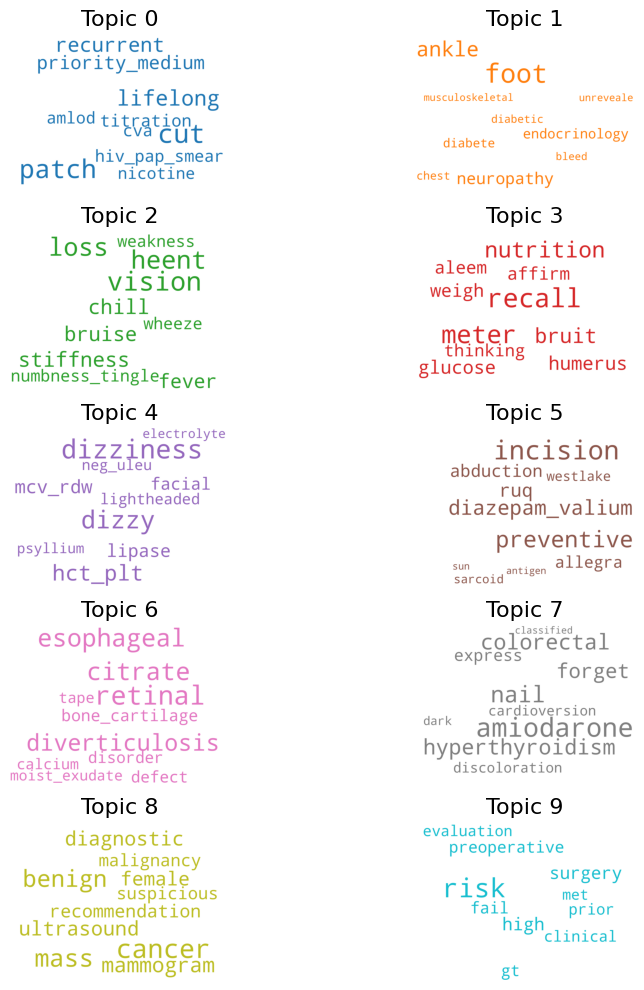

In [ ]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=15,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

# topics = myldamodel.show_topics(formatted=False)
topics = mylist

fig, axes = plt.subplots(5, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [ ]:
topics = mylist

<ipython-input-50-9baf5b322ff9>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right', fontsize=8)


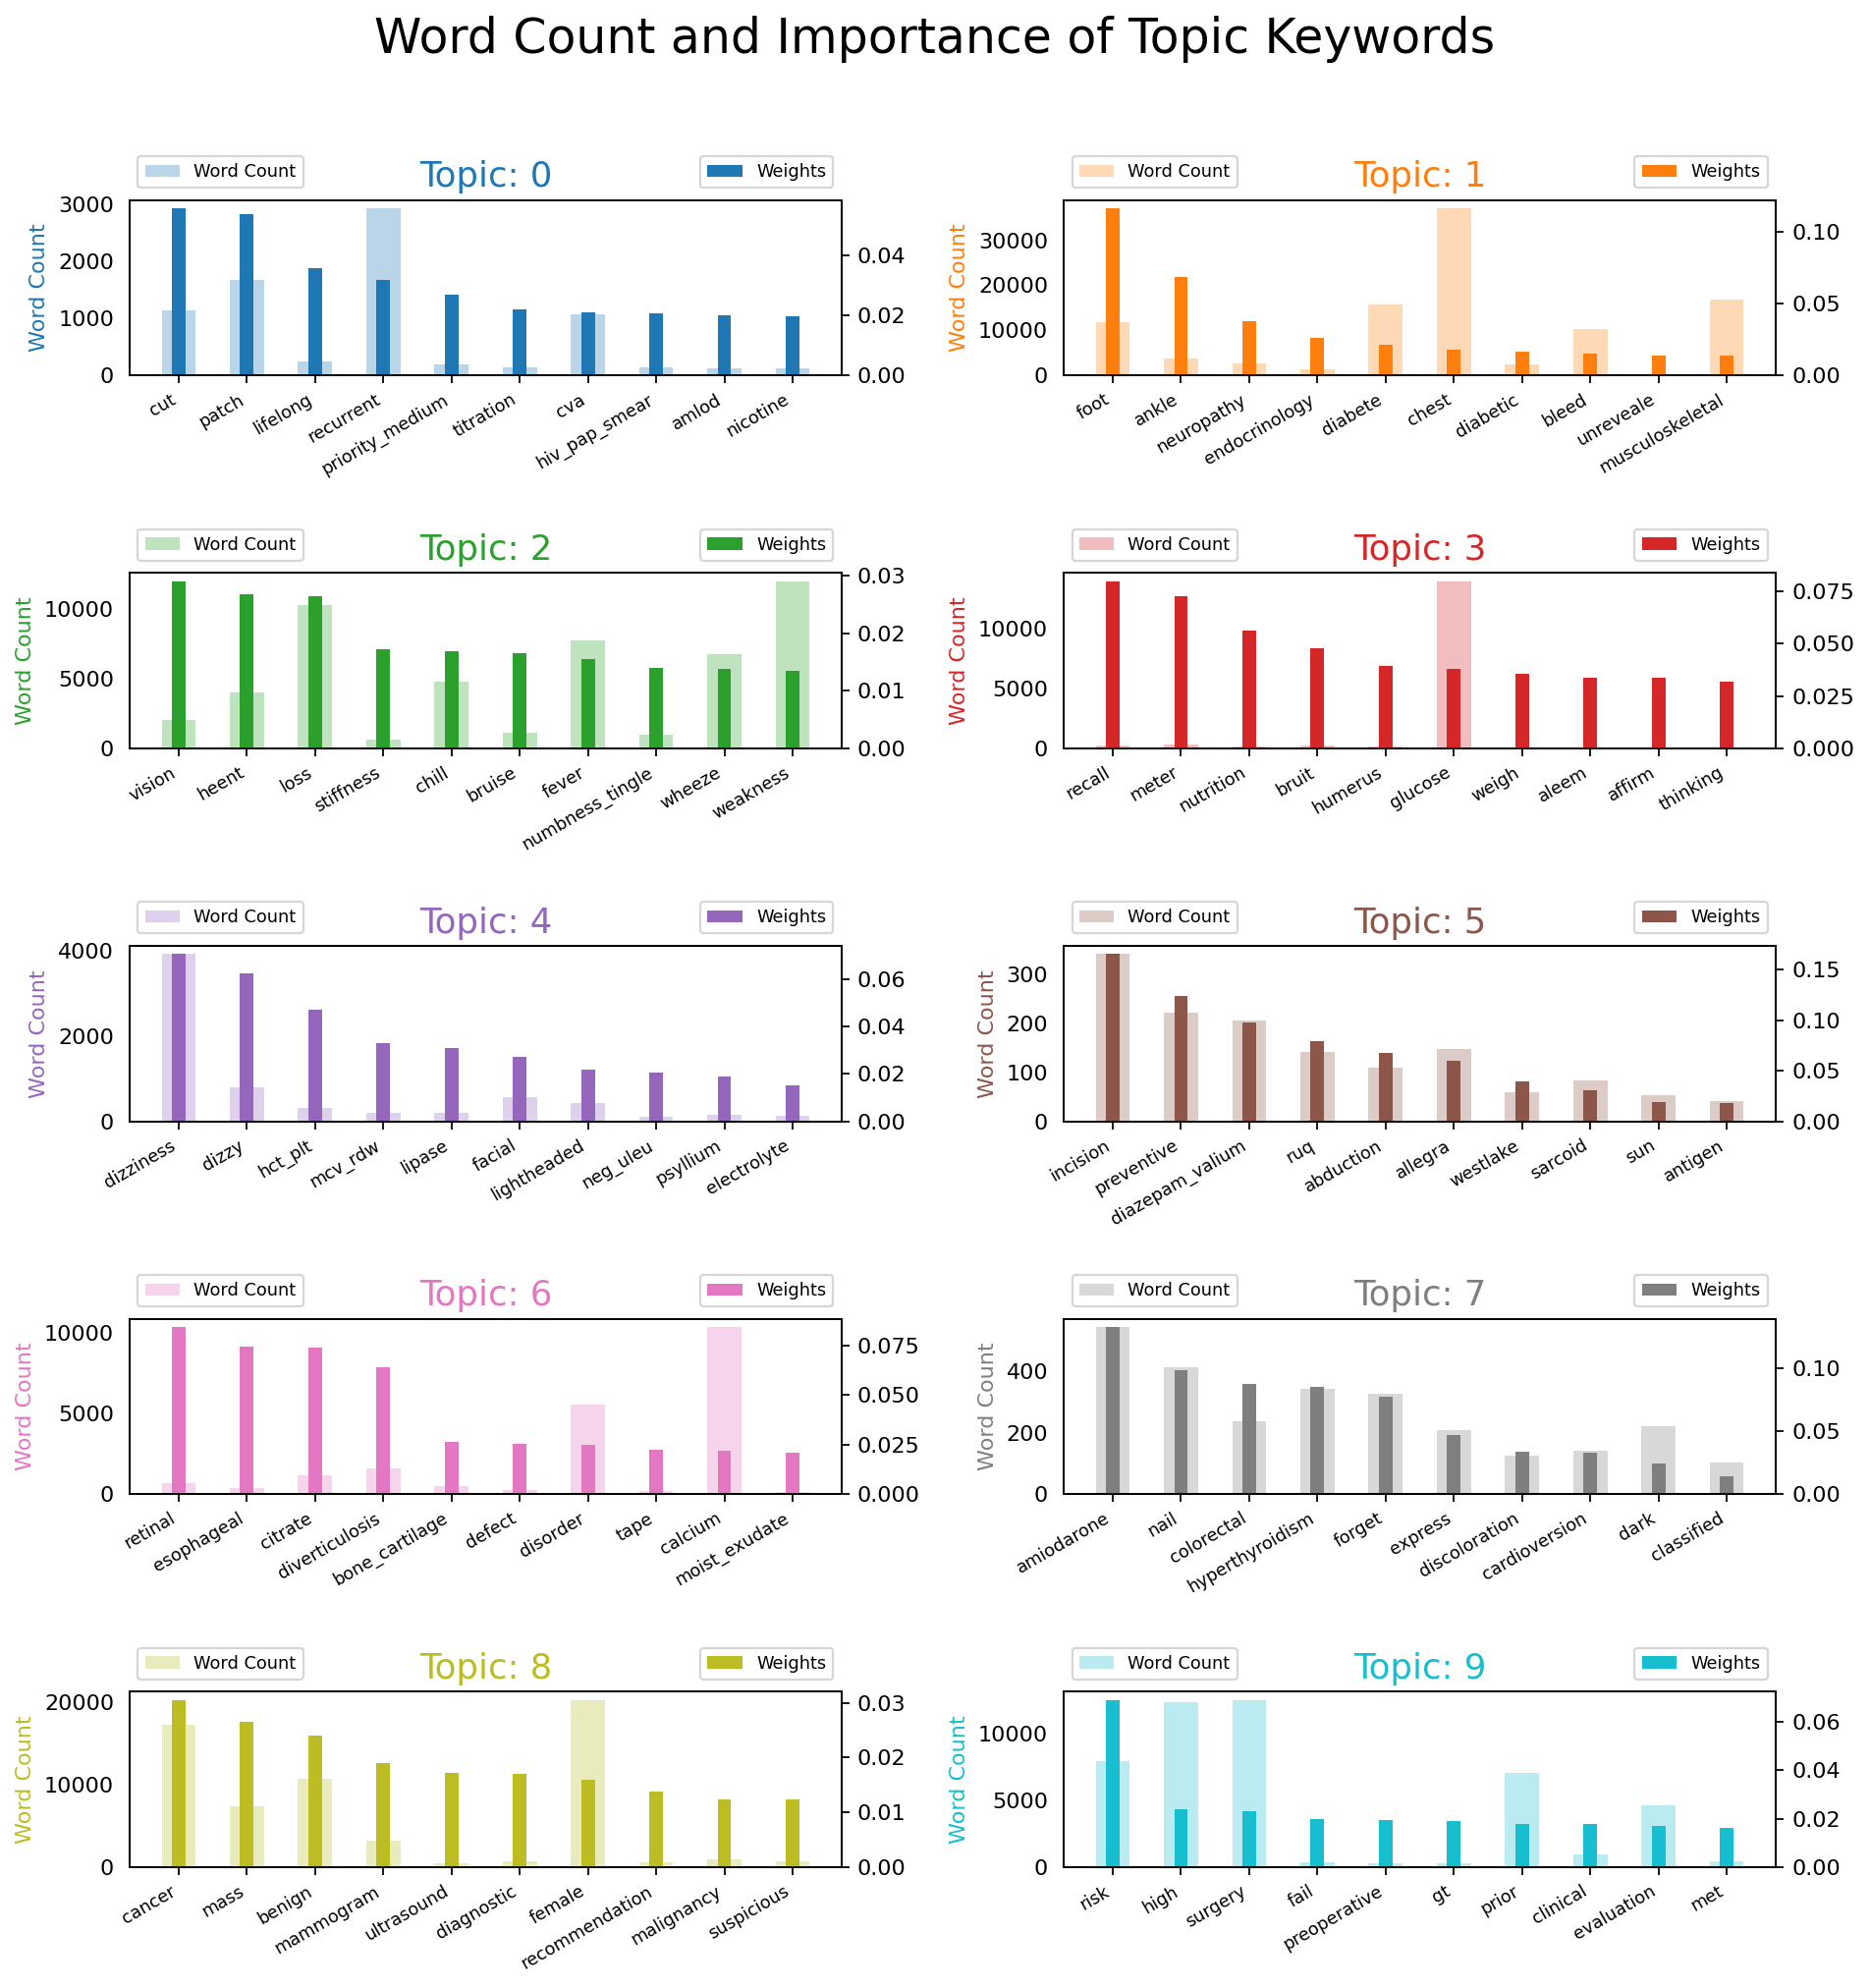

In [ ]:
from collections import Counter
# topics = myldamodel.show_topics(formatted=False)
data_flat = [w for w_list in data_ready for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])

fig, axes = plt.subplots(5, 2, figsize=(12,12), dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])

    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right', fontsize=8)
    ax.legend(loc='upper left', bbox_to_anchor=(0, 1.3), fontsize=8)
    ax_twin.legend(loc='upper right', bbox_to_anchor=(1, 1.3), fontsize=8)

fig.tight_layout(w_pad=2)
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)
plt.show()

In [ ]:
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs, wordid_topics, wordid_phivalues = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=myldamodel, corpus=corpus, end=-1)
print("dominant topics:", dominant_topics)
print("topic percentages:", topic_percentages[:5])

df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
print("df;", df)
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
print("dominant topic in each doc:", dominant_topic_in_each_doc)
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()
print("df dominant topic in each doc:", df_dominant_topic_in_each_doc)

topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
print("topic weightage by doc:", topic_weightage_by_doc)
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()
print("df topic weightage by doc:", df_topic_weightage_by_doc)

topic_top3words = [(i, topic) for i, topics in mylist
                                 for j, (topic, wt) in enumerate(topics) if j < 3]
print("topic top 3 words:", topic_top3words)
df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
print(df_top3words_stacked)
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
print(df_top3words)
df_top3words.reset_index(level=0,inplace=True)
print(df_top3words)

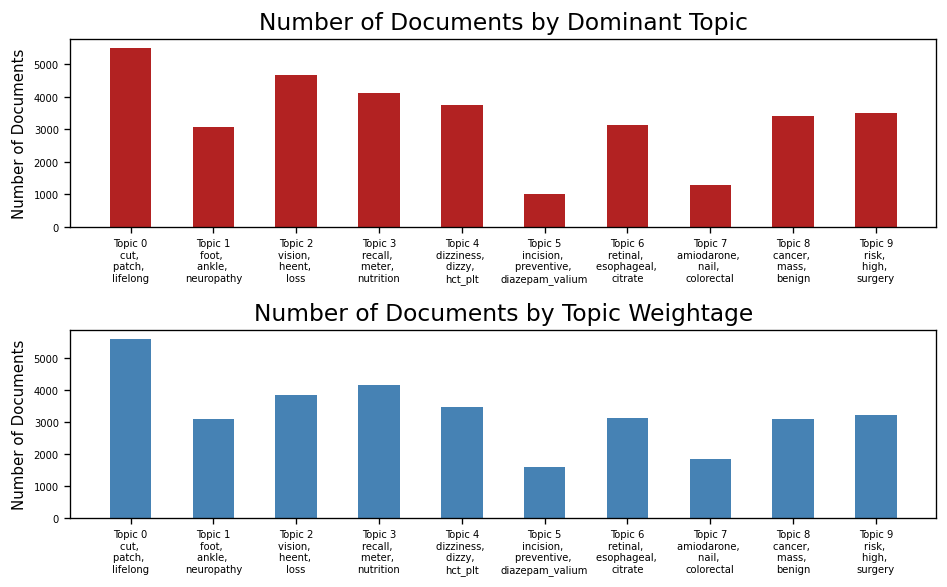

In [ ]:
from matplotlib.ticker import FuncFormatter

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 5), dpi=120)


plt.rc('xtick',labelsize=6)
plt.rc('ytick',labelsize=6)

ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Number of Documents by Dominant Topic', fontsize=14)
ax1.set_ylabel('Number of Documents', fontsize=9)


ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.5, color='steelblue')
ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
ax2.xaxis.set_major_formatter(tick_formatter)
ax2.set_ylabel('Number of Documents', fontsize=9)
ax2.set_title('Number of Documents by Topic Weightage', fontsize=14)

fig.tight_layout()
plt.show()

In [ ]:
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

topic_weights = []
print("Print LDA model corpus:", myldamodel[corpus])
for i, row_list in enumerate(myldamodel[corpus]):
    topic_weights.append([w for i, w in row_list[0]])

print("topic weights:", topic_weights)
print(len(topic_weights[0]))
print(len(topic_weights))


In [ ]:
arr = pd.DataFrame(topic_weights).fillna(0).values
print(arr.shape)
print("Array of topic weights:", arr)

arr = arr[np.amax(arr, axis=1) > 0.35]
print(arr.shape)

topic_num = np.argmax(arr, axis=1)
print("topic num:", topic_num)


In [ ]:
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

In [ ]:
output_notebook()
n_topics = 10
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), width=900, height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])

show(plot)